In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows=None
pd.options.display.max_columns =None
pd.options.display.float_format ='{:.6f}'.format

In [2]:
plt.rcParams['figure.figsize'] = 12,6

# 2. Data Preparation

# 2.1 Read the Data

In [3]:
df = pd.read_excel('DATA_CBM_26_04_2022_rev02.xlsx',sheet_name = 'DATA_CBM_Lifetime Complete')
df.head()

,Lifetime,Broken,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z,Machine Name,Machine ID,Failure Model,Responsible Failure Cause
0,56,1,30.000000,230.000000,1.500000,28.000000,0.404000,0.956000,9.125000,CNC Turning -1,20210045,Vibration Model,Y vibration is lower than Rated Y vibration
1,81,1,30.000000,230.000000,1.500000,28.000000,1.004000,1.143000,9.125000,CNC Turning -2,20210046,Lifetime Model,Exceeded Motor Running Hours as respective Man...
2,60,0,30.000000,230.000000,1.500000,34.000000,0.469000,1.290000,9.121000,CNC Turning -1,20210045,Healthy State,NaN
3,86,1,30.000000,230.000000,1.500000,34.000000,0.373000,1.112000,9.137000,CNC Turning -2,20210046,Lifetime Model,Exceeded Motor Running Hours as respective Man...
4,30,0,30.000000,230.000000,1.500000,31.000000,0.461000,1.282000,9.121000,CNC Turning -2,20210045,Healthy State,NaN


In [4]:
# Number of observations and features in the data

print("Number of Observations in data: ",df.shape[0])
print("Number of features in data: ",df.shape[1])

Number of Observations in data:  1255
Number of features in data:  13


# 2.2 Check the Datatype

Check the datatype of each feature. If the data type is not as per the data definition, change the data type

In [5]:
df.dtypes

Lifetime                       int64
Broken                         int64
Temperature                  float64
Voltage                      float64
Current                      float64
Humidity                     float64
Vibration - X                float64
Vibration  Y                 float64
Vibration  Z                 float64
Machine Name                  object
Machine ID                     int64
Failure Model                 object
Responsible Failure Cause     object
dtype: object

* Because {Broken} is of categorical type so we need to change the datatype from int64 to object type.

In [6]:
df['Broken'] = df['Broken'].astype(object)

# 2.3 Remove Insignificant Features

Machine Id and Responsible Failure Cause are insignficant for further Analysis.Thus drop the column

In [7]:
df1 = df.drop(['Machine ID','Responsible Failure Cause'],axis=1)

In [8]:
df1.head()

,Lifetime,Broken,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z,Machine Name,Failure Model
0,56,1,30.000000,230.000000,1.500000,28.000000,0.404000,0.956000,9.125000,CNC Turning -1,Vibration Model
1,81,1,30.000000,230.000000,1.500000,28.000000,1.004000,1.143000,9.125000,CNC Turning -2,Lifetime Model
2,60,0,30.000000,230.000000,1.500000,34.000000,0.469000,1.290000,9.121000,CNC Turning -1,Healthy State
3,86,1,30.000000,230.000000,1.500000,34.000000,0.373000,1.112000,9.137000,CNC Turning -2,Lifetime Model
4,30,0,30.000000,230.000000,1.500000,31.000000,0.461000,1.282000,9.121000,CNC Turning -2,Healthy State


# 2.4 Distribution of Variables

Distribution of numeric independent variables

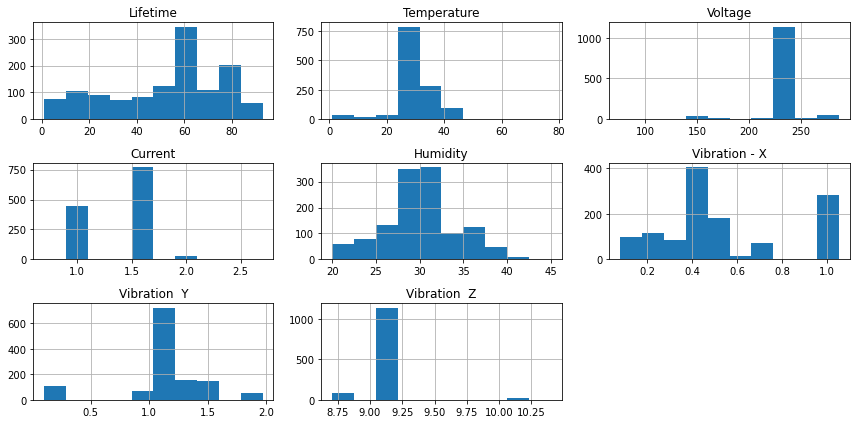

Skewness


Lifetime        -0.558462
Temperature     -0.472320
Voltage         -2.475948
Current         -0.225235
Humidity         0.242820
Vibration - X    0.590071
Vibration  Y    -1.343317
Vibration  Z     3.181236
dtype: float64

In [9]:
df1.drop('Broken',axis=1).hist()
plt.tight_layout()
plt.show()
print('Skewness')
df1.drop('Broken',axis=1).skew()

#### Interpretation: The above plot indicates that all features except{'Voltage' and 'Vibration  Z'} are nearly normally distributed.

#### Distribution of categorical Independent Variables

In [10]:
def cat_dist(data):
    col = ['Machine Name','Failure Model']
    for i in col:
        plt.subplot(1,2,1)
        sns.countplot(df1[i])
        plt.title(f'Count Plot for {i}',fontsize=15)
        plt.xlabel(i,fontsize=12)
        plt.ylabel('Count',fontsize=12)
        plt.tight_layout()
        plt.show()

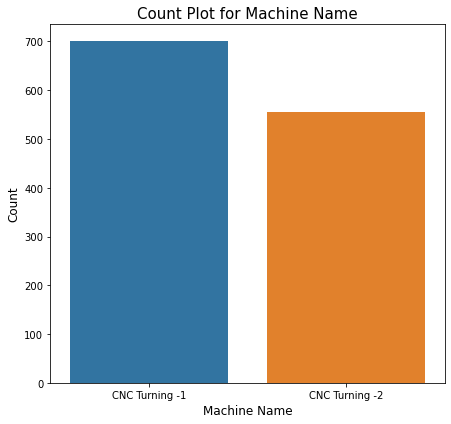

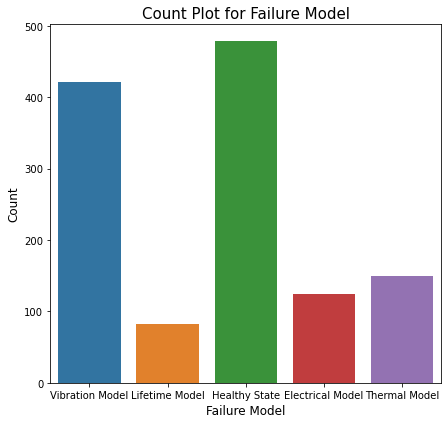

In [11]:
cat_dist(df1)

#### Interpretation: 1) CNC Turning-1 is slightly more than CNC Turning-2 
####                 2) Helathy state presence is highest.
####                 3) Machine mostly broken by vibrational followed by Thermal and Electrical.

### Distribution of Dependent variable

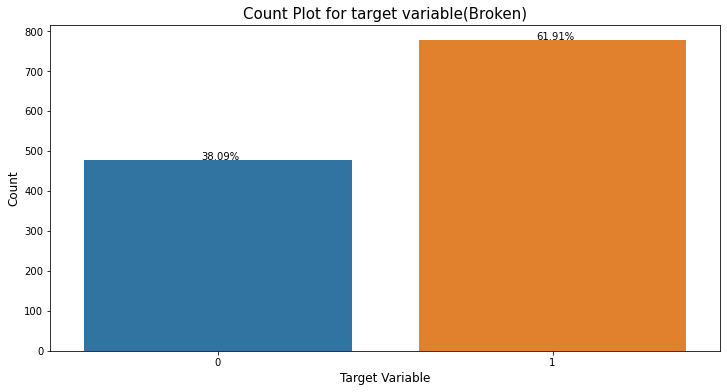

In [12]:
df1_target = df1['Broken'].copy()
df1_target.value_counts()

sns.countplot(x=df1_target)
plt.text(x=-0.05,y=df1_target.value_counts()[0]+1,s=str(round((df1_target.value_counts()[0])*100/len(df1_target),2))+'%')
plt.text(x=0.95,y=df1_target.value_counts()[1]+1,s=str(round((df1_target.value_counts()[1])*100/len(df1_target),2))+'%')
plt.title('Count Plot for target variable(Broken)',fontsize=15)
plt.xlabel('Target Variable',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

#### Interpretation: The above plot shows that there is little imbalance in target variable.

# 2.5 Missing Values and Treatment

In [13]:
total = df1.isnull().sum().sort_values(ascending=False)
percent = round((df1.isnull().sum()*100/len(df1)),2).sort_values(ascending=False)
missing_data = pd.concat([total,percent],keys=['Total','Percentage of missing values'],axis=1)
missing_data

,Total,Percentage of missing values
Lifetime,0,0.000000
Broken,0,0.000000
Temperature,0,0.000000
Voltage,0,0.000000
Current,0,0.000000
Humidity,0,0.000000
Vibration - X,0,0.000000
Vibration Y,0,0.000000
Vibration Z,0,0.000000
Machine Name,0,0.000000


#### Interpretation: There is no missing values in this dataset

# 2.6 Outliers and Treatment 

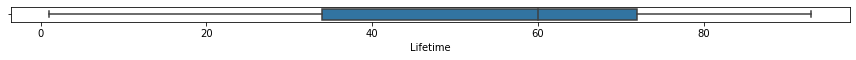

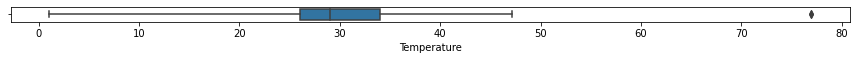

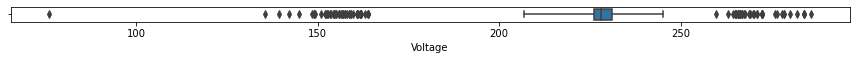

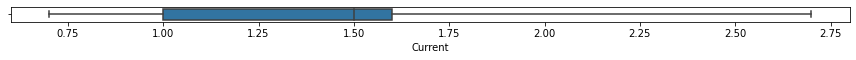

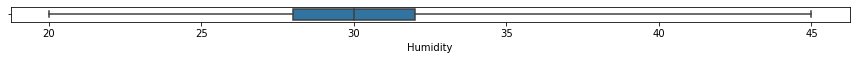

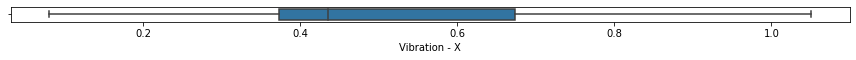

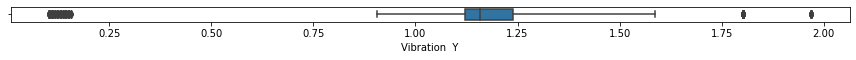

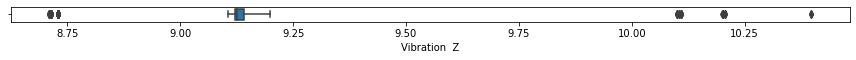

In [14]:
for i in df1.select_dtypes(include=np.number).columns:
    plt.subplot(len((df1.select_dtypes(include=np.number).columns)),1,1)
    sns.boxplot(df1[i],whis=4.5)
    plt.tight_layout()
    plt.show()

#### Interpretation: 
#### 1) There are extreme values present in some features but they are continuous so avoid treating them.
#### 2) As there are only 1255 observations so avoid removing extreme values as it will reduce number of observations which will not be sufficient for training and testing the model properly.

## 2.6 Dummy Encode the Categorical Varibales

#### Split the dependent and independent Variables

In [15]:
df1['Broken'] = df1['Broken'].astype('int64')

In [16]:
df1_target = df1['Broken']
df1_feature = df1.drop('Broken',axis=1)

#### filter numerical and categorical variables

In [17]:
df1_num = df1_feature.select_dtypes(include=[np.number])
df1_num.columns

Index(['Lifetime', 'Temperature', 'Voltage', 'Current', 'Humidity',
       'Vibration - X', 'Vibration  Y', 'Vibration  Z'],
      dtype='object')

In [18]:
df1_cat = df1_feature.select_dtypes(include=object)
df1_cat.columns

Index(['Machine Name', 'Failure Model'], dtype='object')

In [19]:
#dummy_var = pd.get_dummies(data=df1_cat,drop_first=True)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
LE = LabelEncoder()

In [22]:
df1_cat['Machine Name LE'] = LE.fit_transform(df1_cat['Machine Name'])

In [23]:
#df1_cat['Failure Model LE'] = LE.fit_transform(df1_feature['Failure Model'])

In [24]:
dummy_var = df1_cat.drop(['Machine Name','Failure Model'],axis=1).copy()

# 2.7 Scale the Data

Scale the variables to get all variables in same range.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
X_scaler = StandardScaler()

num_scaled = X_scaler.fit_transform(df1_num)
df1_num_scaled = pd.DataFrame(num_scaled,columns=df1_num.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [27]:
X = pd.concat([df1_num_scaled,dummy_var],axis=1)
X.head()

,Lifetime,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z,Machine Name LE
0,0.125835,0.059300,0.130816,0.408667,-0.470537,-0.418374,-0.485081,-0.012624,0
1,1.167269,0.059300,0.130816,0.408667,-0.470537,1.672329,0.022559,-0.012624,1
2,0.292464,0.059300,0.130816,0.408667,0.989951,-0.191881,0.421612,-0.033671,0
3,1.375555,0.059300,0.130816,0.408667,0.989951,-0.526393,-0.061596,0.050516,1
4,-0.957256,0.059300,0.130816,0.408667,0.259707,-0.219757,0.399895,-0.033671,1


In [28]:
#X = pd.concat([df1_num,dummy_var],axis=1)
#X.head()

# 2.8 Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
import statsmodels.api as sm

In [31]:
X = sm.add_constant(X)
X_train,X_test,y_train,y_test = train_test_split(X,df1_target,random_state=10,test_size=0.3)
print('X train',X_train.shape)
print('y train',y_train.shape)
print('X test',X_test.shape)
print('y test',y_test.shape)

X train (878, 10)
y train (878,)
X test (377, 10)
y test (377,)


##### Create a generalized function to create a dataframe containing the scores for the models.

In [32]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score

In [33]:
score_card = pd.DataFrame(columns=['Probability Cutoff','AUC Score','Precision Score','Recall Score',
                                   'Accuracy Score','Kappa Score','f1-score'])
def update_score_card(model,cutoff):
    # y_pred_prob be the predicted values of target variable
    y_pred_prob = logreg.predict(X_test)
    
    # convert probabilities to 0 and 1 
    y_pred = [0 if x<cutoff else 1 for x in y_pred_prob]
    
    global score_card
    
    score_card = score_card.append({'Probability Cutoff':cutoff,
                                   'AUC Score':metrics.roc_auc_score(y_test,y_pred),
                                   'Precision Score':metrics.precision_score(y_test,y_pred),
                                   'Recall Score':metrics.recall_score(y_test,y_pred),
                                   'Accuracy Score':metrics.accuracy_score(y_test,y_pred),
                                   'Kappa Score':metrics.cohen_kappa_score(y_test,y_pred),
                                   'f1-score':metrics.f1_score(y_test,y_pred)},ignore_index=True)

# USE Decision Tree to classify

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
df1.head()

,Lifetime,Broken,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z,Machine Name,Failure Model
0,56,1,30.000000,230.000000,1.500000,28.000000,0.404000,0.956000,9.125000,CNC Turning -1,Vibration Model
1,81,1,30.000000,230.000000,1.500000,28.000000,1.004000,1.143000,9.125000,CNC Turning -2,Lifetime Model
2,60,0,30.000000,230.000000,1.500000,34.000000,0.469000,1.290000,9.121000,CNC Turning -1,Healthy State
3,86,1,30.000000,230.000000,1.500000,34.000000,0.373000,1.112000,9.137000,CNC Turning -2,Lifetime Model
4,30,0,30.000000,230.000000,1.500000,31.000000,0.461000,1.282000,9.121000,CNC Turning -2,Healthy State


In [36]:
df2 = df1.drop('Failure Model',axis=1).copy()

In [37]:
df2.dtypes

Lifetime           int64
Broken             int64
Temperature      float64
Voltage          float64
Current          float64
Humidity         float64
Vibration - X    float64
Vibration  Y     float64
Vibration  Z     float64
Machine Name      object
dtype: object

#### split the dataset into independent and dependent variables

In [38]:
df2_target = df2['Broken']
df2_feature = df2.drop('Broken',axis=1)

#### split the independent variables into numerical and categorical

In [39]:
df2_num = df2_feature.select_dtypes(include=np.number)
df2_num.columns

Index(['Lifetime', 'Temperature', 'Voltage', 'Current', 'Humidity',
       'Vibration - X', 'Vibration  Y', 'Vibration  Z'],
      dtype='object')

In [40]:
df2_cat = df2_feature.select_dtypes(include=object)
df2_cat.columns

Index(['Machine Name'], dtype='object')

In [41]:
df2_cat['Machine Name LE'] = LE.fit_transform(df2_cat['Machine Name'])

In [42]:
dummy_var = df2_cat.drop(['Machine Name'],axis=1).copy()

#### concatenate numerical variable and dummy encode variable

In [43]:
X = pd.concat([df2_num,dummy_var],axis=1)
X.head()

,Lifetime,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z,Machine Name LE
0,56,30.000000,230.000000,1.500000,28.000000,0.404000,0.956000,9.125000,0
1,81,30.000000,230.000000,1.500000,28.000000,1.004000,1.143000,9.125000,1
2,60,30.000000,230.000000,1.500000,34.000000,0.469000,1.290000,9.121000,0
3,86,30.000000,230.000000,1.500000,34.000000,0.373000,1.112000,9.137000,1
4,30,30.000000,230.000000,1.500000,31.000000,0.461000,1.282000,9.121000,1


# Train-Test split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,df2_target,test_size=0.3,random_state=10)
print("X train",X_train.shape)
print("Y train",y_train.shape)
print("X test",X_test.shape)
print("Y test",y_test.shape)

X train (878, 9)
Y train (878,)
X test (377, 9)
Y test (377,)


In [45]:
decision_tree_classification = DecisionTreeClassifier(criterion='entropy',random_state=10)

In [46]:
decision_tree = decision_tree_classification.fit(X_train,y_train)

# calculate the metrics for train and test set

In [47]:
def get_train_report(model):
    pred_train = model.predict(X_train)
    return(classification_report(y_train,pred_train))

def get_test_report(model):
    pred_test = model.predict(X_test)
    return(classification_report(y_test,pred_test))

#### Calculate performance measure on train and test set

In [48]:
print(get_train_report(decision_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       344
           1       1.00      1.00      1.00       534

    accuracy                           1.00       878
   macro avg       1.00      1.00      1.00       878
weighted avg       1.00      1.00      1.00       878



In [49]:
print(get_test_report(decision_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       243

    accuracy                           1.00       377
   macro avg       1.00      1.00      1.00       377
weighted avg       1.00      1.00      1.00       377



In [50]:
y_pred_decision_tree = decision_tree.predict(X_test)

In [51]:
y_pred_decision_tree[0:5]

array([1, 1, 1, 0, 1], dtype=int64)

In [52]:
Precision = precision_score(y_test,y_pred_decision_tree)
Recall =    recall_score(y_test,y_pred_decision_tree)
Accuracy =  accuracy_score(y_test,y_pred_decision_tree)

In [53]:
print("Precision:",Precision)
print("Recall:",Recall)
print("Accuracy:",Accuracy)

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


# Identify the important features

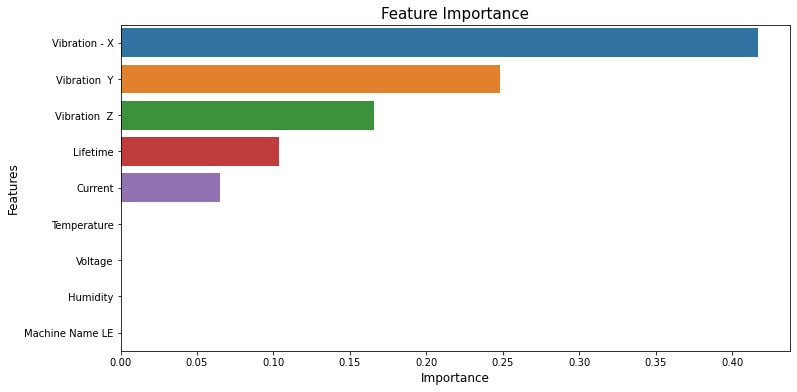

In [54]:
important_features = pd.DataFrame({'Features':X_train.columns,
                                  'Importance':decision_tree.feature_importances_})
important_features = important_features.sort_values('Importance',ascending=False)

sns.barplot(x='Importance',y='Features',data=important_features)
plt.title('Feature Importance',fontsize=15)
plt.xlabel('Importance',fontsize=12)
plt.ylabel('Features',fontsize=12)
plt.show()